In [106]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-police-shootings/fatal-police-shootings-data.csv


# Police Shooting Insights

With the nation divided on the conduct of law enforcement, I decided to look into the Washington Post dataset to investigate trends hidden in the numbers.

Given the current scenarios with protests breaking out across many cities and states, I decided to focus the analysis and visualizations around the following measures:

* Geography - Death toll by State and City. 
* Race - Death toll by race
* Armed Category - If individuals were armed when they were killed
* Flee Category - If individuals were fleeing from the police when they were killed
* Threat Level - If individuals were attacking the police when they were killed
* Time - Death by race analyzed by Month and Year 
* Body Camera - If police disproportionately kills more of a specific race with or without body camera


Basic assumptions. 

As the rules of society and law enforcement tell us, if you encounter law enforcement agent and comply to all their commands, there will be no reason for law enforcement to use lethal force. On the other hand, if you do not comply with commands and try to attack agents in any way, shape or form, law enforcement may use lethal force in case they feel their life is in danger. 


Key Findings



1. Individuals that were 'Unarmed', 'Not Attacking', and 'Not Fleeing' from the police accounted for 1.9% of all deaths in the dataset. This was a total of 103 individuals over the last 5 years. Focusing on racial biases, I found that the % of deaths by race were of:

White: 44.11%, Black: 30.39%, Hispanic: 18.62%, Other: 2.94%, Asian: 2.94%, Native American: 0.09%. Therefore, 'White' was the most affected race by 'unjustified' shooting situations, followed by 'Black' and 'Hispanic'.


2. Individuals that were 'Armed', 'Attacking', but 'Not Fleeing' from the police showed the highest mortality levels. 

White: 55.44%, Black: 24.52%, Hispanic: 15.53%, Asian: 2.06%, Native American: 1.42%, Other: 1.00%. Therefore, we can see that 'White' leads aggressive encounters with the police by a large margin, followed by 'Black' and 'Hispanic' respectively.

3. Individuals that were 'Armed', 'Attacking', and 'Fleeing' from the police was the second highest mortality levels. 

White: 46.43%, Black: 31.83%, Hispanic: 18.33%, Native American: 1.53%, Other 0.98%, Asian: 0.87%. In this analysis, we can see that 'White' leads in this category, but there is a substantial increase in the death toll for 'Black'. This is likely because 'Black' has the highest rate of 'Fleeing' from law enforcement. 

4. There was no substantial variation in death rates throughout the months of the year. The death rates also remained relatively constant from 2015 through 2019, with less than 1% variation.  


5. Regarding Body Cameras, 'White' were killed the most when not using body cameras. Only 9.45% of 'White' deaths were caught on a body camera, followed by 11.75% for 'Hispanic' and 15.71% for 'Black'. 'Asian' was the most likely to be recorded on body cameras, with 17.20%. With these numbers in mind, White were 66.24% more likely to be killed without body camera when compared to Black, and 24.33% more likely to be killed without body camera when compared to Hispanic.



**Were people primarily armed?**


Considering the entire dataset, the 'Other' race was the lowest armed at 86%, and surprisingly 'Asian' led the armed category at 91.1%, despite the low number of total 'Asian' fatalities.

**Which race fled the most from the police?**


'Black' led the flee category at 41.18%, while'Asian' was the least likely race to flee from the police at 19.31%.

**Which race was most likely to attack the Police**


In order to address this issue, I analyzed the likelihood of 'Armed' and 'Unarmed' individuals to 'Attack' officers.

When 'Armed', 'Other' was most likely to attack the police at 74.35%, 'Black' at 72.68% and 'White' at 70.10%
While when 'Unarmed', 'White' led the number of attacks at 43.15% and 'Black' following at 41.46%



**When looking at Geography these were the deadliest States and Cities for White, Black and Hispanic.**

* City: 'Chicago' was the deadliest city for 'Black', 'Los Angeles' the deadliest city for 'Hispanic' and 'Phoenix' the deadliest city for 'White'.

* State: 'California' was the deadliest state for 'Black', 'Hispanic' and 'White'



Surprisingly, the deadliest states for individuals 'Unarmed' , 'Not Attacking' and 'Not Fleeing' diverged from the states with the highest numbers of total fatalities. These states were:

1. NE: 8.33%
2. DC: 7.69%
3. MN: 4.91%
4. CT: 4.76%
5. OK: 4.26%

* These numbers account for the percentage of 'Unarmed' , 'Not Attacking' and 'Not Fleeing' killed compared to the total deaths in the state.



Almost half of all individuals killed under these circumstances above were 'White'. 

1. White: 46.43%
2. Black: 31.83%
3. Hispanic: 18.33%



Therefore, considering only this dataset and disregarding external factors, the analysis does not suggest that the police is disproportionately targeting minorities. In most categories, 'White' led the death toll, followed by 'Black' and 'Hispanic'. A small percentage (1.9%) of deaths were from individuals 'Unarmed' , 'Not Attacking' and 'Not Fleeing', suggesting that 'Police Brutality' is not a predominant source of mortality. Within cases of 'Police Brutality', 'White' was the most impacted, being 50% more likely to die compared to 'Black', and 250% compared to 'Hispanic'. 

# IMPORTING LABRARIES AND READING DATA

In [163]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
%matplotlib inline

In [164]:
df1 = pd.read_csv('../input/data-police-shootings/fatal-police-shootings-data.csv')


# INITIAL LOOK AT THE DATAFRAME

In [165]:
df1.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [6]:
df1.shape

(5416, 14)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5416 non-null   int64  
 1   name                     5416 non-null   object 
 2   date                     5416 non-null   object 
 3   manner_of_death          5416 non-null   object 
 4   armed                    5189 non-null   object 
 5   age                      5181 non-null   float64
 6   gender                   5414 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     5416 non-null   object 
 9   state                    5416 non-null   object 
 10  signs_of_mental_illness  5416 non-null   bool   
 11  threat_level             5416 non-null   object 
 12  flee                     5167 non-null   object 
 13  body_camera              5416 non-null   bool   
dtypes: bool(2), float64(1), 

In [8]:
df1.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                      227
age                        235
gender                       2
race                       521
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       249
body_camera                  0
dtype: int64

In [9]:
df1.describe()

,id,age
count,5416.000000,5181.000000
mean,3010.398264,37.117931
std,1695.786456,13.116135
min,3.000000,6.000000
25%,1545.750000,27.000000
50%,3009.500000,35.000000
75%,4486.250000,46.000000
max,5927.000000,91.000000


In [10]:
df1.id = df1.id.astype('category')
df1.armed = df1.armed.astype('category')
df1.gender = df1.gender.astype('category')
df1.city = df1.city.astype('category')
df1.state = df1.state.astype('category')
df1.race = df1.race.astype('category')
df1.threat_level = df1.threat_level.astype('category')
df1.flee = df1.flee.astype('category')
df1.manner_of_death = df1.manner_of_death.astype('category')

#Properly assinging categorical records as a category

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       5416 non-null   category
 1   name                     5416 non-null   object  
 2   date                     5416 non-null   object  
 3   manner_of_death          5416 non-null   category
 4   armed                    5189 non-null   category
 5   age                      5181 non-null   float64 
 6   gender                   5414 non-null   category
 7   race                     4895 non-null   category
 8   city                     5416 non-null   category
 9   state                    5416 non-null   category
 10  signs_of_mental_illness  5416 non-null   bool    
 11  threat_level             5416 non-null   category
 12  flee                     5167 non-null   category
 13  body_camera              5416 non-null   bool    
dtypes: bool(

In [12]:
df1.corr()


,age,signs_of_mental_illness,body_camera
age,1.000000,0.105763,-0.040138
signs_of_mental_illness,0.105763,1.000000,0.051838
body_camera,-0.040138,0.051838,1.000000


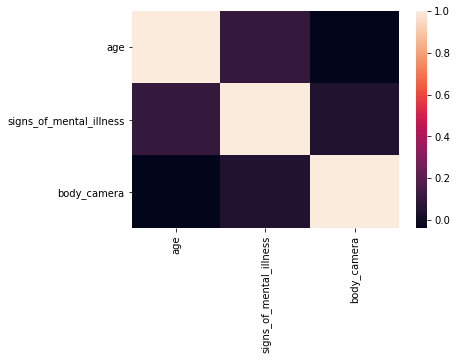

In [13]:
sns.heatmap(df1.corr())

In [14]:
df1.replace(to_replace = ['A'], value = ['Asian'], inplace = True)
df1.replace(to_replace = ['B'], value = ['Black'], inplace = True)
df1.replace(to_replace = ['H'], value = ['Hispanic'], inplace = True)
df1.replace(to_replace = ['N'], value = ['Native American'], inplace = True)
df1.replace(to_replace = ['O'], value = ['Other'], inplace = True)
df1.replace(to_replace = ['W'], value = ['White'], inplace = True)

#Properly naming each one of the races, to facilitate analysis and comprehension in visualizations

In [15]:
df1['month'] = pd.to_datetime(df1['date']).dt.month
df1['year'] = pd.to_datetime(df1['date']).dt.year
df1.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,month,year
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,1,2015
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,1,2015
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,1,2015
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,1,2015
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,1,2015


In [16]:
MissingPercentage = (((df1.isna().sum())/df1.shape[0])*100)
MissingPercentage

id                         0.000000
name                       0.000000
date                       0.000000
manner_of_death            0.000000
armed                      4.191285
age                        4.338996
gender                     0.036928
race                       9.619645
city                       0.000000
state                      0.000000
signs_of_mental_illness    0.000000
threat_level               0.000000
flee                       4.597489
body_camera                0.000000
month                      0.000000
year                       0.000000
dtype: float64

In [17]:
# Exploratory look at the data. Focus on Manner of Death, Armed, Gender, Race, Threat Level and Flee

In [18]:
df1.manner_of_death.value_counts()
#Majority of individuals were 'just' shot and not tasered and shot. 

shot                5146
shot and Tasered     270
Name: manner_of_death, dtype: int64

In [19]:
df1.armed.unique()

# Large variety of armed categories. Will have to be categorized in order to improve comprehension 

[gun, unarmed, toy weapon, nail gun, knife, ..., Airsoft pistol, baseball bat and knife, vehicle and machete, ice pick, car, knife and mace]
Length: 94
Categories (93, object): [gun, unarmed, toy weapon, nail gun, ..., baseball bat and knife, vehicle and machete, ice pick, car, knife and mace]

In [123]:
df1.armed.value_counts(normalize=True)

#we can see the majority of the armed categories were gun, knife, toy weapon and undetermined

gun                   0.589709
knife                 0.152631
unarmed               0.068029
toy weapon            0.035845
undetermined          0.031605
                        ...   
barstool              0.000193
spear                 0.000193
gun and sword         0.000193
pepper spray          0.000193
contractor's level    0.000193
Name: armed, Length: 93, dtype: float64

In [21]:
df1.race.value_counts(normalize=True)
# White, Black and Hispanic accounted for 95.5% of all deaths. Might be worth focusing on them, and contrasting these three races with other races

White              0.505822
Black              0.265169
Hispanic           0.184270
Asian              0.018999
Native American    0.015935
Other              0.009806
Name: race, dtype: float64

In [22]:
df1.threat_level.value_counts(normalize=True)

# Majority of individuals killed attacked the Police. One observation is that the 'Other' and 'Undertermined' categories are very subjective.

attack          0.645310
other           0.310561
undetermined    0.044129
Name: threat_level, dtype: float64

In [23]:
df1.flee.value_counts(normalize=True)
# We can see that a large part of the individuals don't run from the police. 

Not fleeing    0.660151
Car            0.174182
Foot           0.133927
Other          0.031740
Name: flee, dtype: float64

# CREATING CATEGORIES - BUCKETING

In [24]:
# In order to facilitate our analysis, and understand if there is racial baisis in shootings, we will create categories for the following
# Armed = Will be categorized into Armed and Unarmed
# Fleeing = Will be categorized into Fleeing and Not Fleeing


**ARMED CATEGORY - BUCKET**

In [25]:
list(df1.armed.unique())

['gun',
 'unarmed',
 'toy weapon',
 'nail gun',
 'knife',
 nan,
 'shovel',
 'hammer',
 'hatchet',
 'undetermined',
 'sword',
 'machete',
 'box cutter',
 'metal object',
 'screwdriver',
 'lawn mower blade',
 'flagpole',
 'guns and explosives',
 'cordless drill',
 'crossbow',
 'metal pole',
 'Taser',
 'metal pipe',
 'metal hand tool',
 'blunt object',
 'metal stick',
 'sharp object',
 'meat cleaver',
 'carjack',
 'chain',
 "contractor's level",
 'unknown weapon',
 'stapler',
 'beer bottle',
 'bean-bag gun',
 'baseball bat and fireplace poker',
 'straight edge razor',
 'gun and knife',
 'ax',
 'brick',
 'baseball bat',
 'hand torch',
 'chain saw',
 'garden tool',
 'scissors',
 'pole',
 'pick-axe',
 'flashlight',
 'vehicle',
 'baton',
 'spear',
 'chair',
 'pitchfork',
 'hatchet and gun',
 'rock',
 'piece of wood',
 'bayonet',
 'pipe',
 'glass shard',
 'motorcycle',
 'pepper spray',
 'metal rake',
 'crowbar',
 'oar',
 'machete and gun',
 'tire iron',
 'air conditioner',
 'pole and knife',
 

In [26]:
UnavailableUndetermined = ['NaN','undetermined',]
Unarmed = ['unarmed']
Armed = ['gun',
 'toy weapon',
 'nail gun',
 'knife',
 'shovel',
 'hammer',
 'hatchet',
 'sword',
 'machete',
 'box cutter',
 'metal object',
 'screwdriver',
 'lawn mower blade',
 'flagpole',
 'guns and explosives',
 'cordless drill',
 'crossbow',
 'metal pole',
 'Taser',
 'metal pipe',
 'metal hand tool',
 'blunt object',
 'metal stick',
 'sharp object',
 'meat cleaver',
 'carjack',
 'chain',
 "contractor's level",
 'unknown weapon',
 'stapler',
 'beer bottle',
 'bean-bag gun',
 'baseball bat and fireplace poker',
 'straight edge razor',
 'gun and knife',
 'ax',
 'brick',
 'baseball bat',
 'hand torch',
 'chain saw',
 'garden tool',
 'scissors',
 'pole',
 'pick-axe',
 'flashlight',
 'vehicle',
 'baton',
 'spear',
 'chair',
 'pitchfork',
 'hatchet and gun',
 'rock',
 'piece of wood',
 'bayonet',
 'pipe',
 'glass shard',
 'motorcycle',
 'pepper spray',
 'metal rake',
 'crowbar',
 'oar',
 'machete and gun',
 'tire iron',
 'air conditioner',
 'pole and knife',
 'baseball bat and bottle',
 'fireworks',
 'pen',
 'chainsaw',
 'gun and sword',
 'gun and car',
 'pellet gun',
 'claimed to be armed',
 'BB gun',
 'incendiary device',
 'samurai sword',
 'bow and arrow',
 'gun and vehicle',
 'vehicle and gun',
 'wrench',
 'walking stick',
 'barstool',
 'grenade',
 'BB gun and vehicle',
 'wasp spray',
 'air pistol',
 'Airsoft pistol',
 'baseball bat and knife',
 'vehicle and machete',
 'ice pick',
 'car, knife and mace']

In [27]:
df_UnavailableUndetermined = pd.DataFrame({'armed': UnavailableUndetermined})
df_UnavailableUndetermined ['category'] = 'Unavailable_Undetermined'
df_UnavailableUndetermined

,armed,category
0,NaN,Unavailable_Undetermined
1,undetermined,Unavailable_Undetermined


In [28]:
df_Unarmed = pd.DataFrame({'armed': Unarmed})
df_Unarmed ['category'] = 'Unarmed'
df_Unarmed

,armed,category
0,unarmed,Unarmed


In [29]:
df_Armed = pd.DataFrame({'armed': Armed})
df_Armed ['category'] = 'Armed'
df_Armed

,armed,category
0,gun,Armed
1,toy weapon,Armed
2,nail gun,Armed
3,knife,Armed
4,shovel,Armed
...,...,...
86,Airsoft pistol,Armed
87,baseball bat and knife,Armed
88,vehicle and machete,Armed
89,ice pick,Armed


In [30]:
df_lookup2 = df_Armed
df_lookup2

,armed,category
0,gun,Armed
1,toy weapon,Armed
2,nail gun,Armed
3,knife,Armed
4,shovel,Armed
...,...,...
86,Airsoft pistol,Armed
87,baseball bat and knife,Armed
88,vehicle and machete,Armed
89,ice pick,Armed


In [31]:
df_lookup1 = df_lookup2.append(df_Unarmed)

In [32]:
df_lookup1.shape

(92, 2)

In [33]:
df_lookup = df_lookup1.append(df_UnavailableUndetermined)
df_lookup

,armed,category
0,gun,Armed
1,toy weapon,Armed
2,nail gun,Armed
3,knife,Armed
4,shovel,Armed
...,...,...
89,ice pick,Armed
90,"car, knife and mace",Armed
0,unarmed,Unarmed
0,NaN,Unavailable_Undetermined


In [34]:
df2 = pd.merge(df1, df_lookup, on = 'armed', how = 'outer' )


In [35]:
df2 = df2.rename({'category':'armed_category'}, axis = 1)
df2.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,month,year,armed_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,1.0,2015.0,Armed
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,1.0,2015.0,Armed
2,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,White,Guthrie,OK,False,attack,Not fleeing,False,1.0,2015.0,Armed
3,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,Hispanic,Chandler,AZ,False,attack,Car,False,1.0,2015.0,Armed
4,15,Brock Nichols,2015-01-06,shot,gun,35.0,M,White,Assaria,KS,False,attack,Not fleeing,False,1.0,2015.0,Armed


In [36]:
df2.armed_category.value_counts(normalize = True)

Armed                       0.900193
Unarmed                     0.068015
Unavailable_Undetermined    0.031792
Name: armed_category, dtype: float64

**FLEE CATEGORY - BUCKET**

In [37]:
df2.flee.unique()

[Not fleeing, Car, Foot, Other, NaN]
Categories (4, object): [Not fleeing, Car, Foot, Other]

In [38]:
Fleeing = ['Car', 'Foot', 'Other']
NotFleeing = ['Not fleeing']


In [39]:
FleeLookUp2 = pd.DataFrame({'flee': Fleeing})
FleeLookUp2['flee_category'] = "Fleeing"
FleeLookUp1 = pd.DataFrame({'flee': NotFleeing})
FleeLookUp1['flee_category'] = "Not_Fleeing"


In [40]:
FleeLookUp = FleeLookUp1.append(FleeLookUp2)
FleeLookUp.head()

,flee,flee_category
0,Not fleeing,Not_Fleeing
0,Car,Fleeing
1,Foot,Fleeing
2,Other,Fleeing


In [41]:
df3 = pd.merge(df2,FleeLookUp,how='outer', on = 'flee')
df3.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,month,year,armed_category,flee_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,1.0,2015.0,Armed,Not_Fleeing
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,1.0,2015.0,Armed,Not_Fleeing
2,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,White,Guthrie,OK,False,attack,Not fleeing,False,1.0,2015.0,Armed,Not_Fleeing
3,15,Brock Nichols,2015-01-06,shot,gun,35.0,M,White,Assaria,KS,False,attack,Not fleeing,False,1.0,2015.0,Armed,Not_Fleeing
4,21,Ron Sneed,2015-01-07,shot,gun,31.0,M,Black,Freeport,TX,False,attack,Not fleeing,False,1.0,2015.0,Armed,Not_Fleeing


In [42]:
df3.flee_category.value_counts(normalize=True)

Not_Fleeing    0.660151
Fleeing        0.339849
Name: flee_category, dtype: float64

# INITIAL LOOK AT THE DATA

Text(0.5, 1.0, 'Deaths by Race\nNormalized Data')

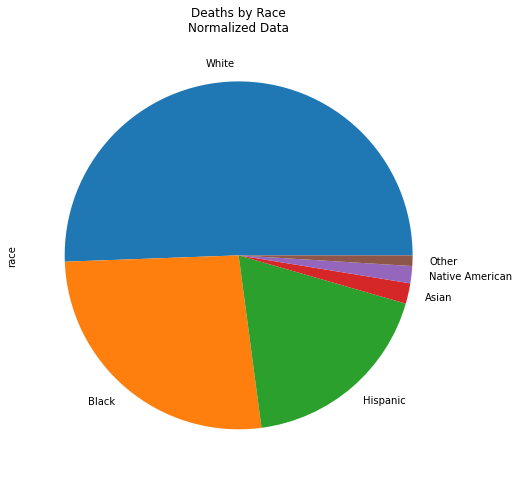

In [43]:
df3.race.value_counts(normalize=True)
#As we've seen previously, the majority of crimes are committed by 3 racial groups. White, Black and Hispanic
df3.race.value_counts(normalize=True).plot(kind='pie', figsize = (8,8))
plt.title('Deaths by Race\nNormalized Data')

In [44]:
df3.state.value_counts(normalize=True)[:10]

CA    0.147526
TX    0.088811
FL    0.064623
AZ    0.046898
CO    0.036004
GA    0.033604
OK    0.030281
NC    0.028804
OH    0.028619
WA    0.028065
Name: state, dtype: float64

In [45]:
df3.state.value_counts(normalize=True)[:10].sum()
#we can see that the top 10 states in the US account for 53.32% of all deaths in the US. Migh be worth focusing on these states to look for trends

0.5332348596750369

In [46]:
df3.city.value_counts(normalize=True)[:10]
#Interesting topic: For the top 10 states, some capitals were not present in the top 10 cities, or the opposite where the city is in the top 10, but not the state. This is the case for:
# Denver/CO, Kansas City/Kansas,Oklahoma / Oklahoma City, Georgia/ Atlanta, North Carolina / Raleigh, Washington / Seattle


Los Angeles     0.015694
Phoenix         0.014402
Houston         0.010524
Las Vegas       0.008309
San Antonio     0.007939
Chicago         0.007016
Columbus        0.007016
Albuquerque     0.006462
Kansas City     0.006278
Jacksonville    0.006093
Name: city, dtype: float64

In [47]:
# I will make a few filtered data sets to evaluate only specific sections of the dataset related to race, state and city

In [129]:
RaceList = ['White', 'Black', 'Hispanic']
df3_race = df3[df3.race.isin(RaceList)]
df3_race.race.unique()

array(['White', 'Black', 'Hispanic'], dtype=object)

In [49]:
#StateList = ['CA','TX','FL','AZ','CO','GA','OK','NC','OH','WA']
#df3_race_state = df3_race[df3_race.state.isin(StateList)]
#df3_race_state.state.unique()

[OK, TX, CA, CO, AZ, OH, GA, FL, NC, WA]
Categories (10, object): [OK, TX, CA, CO, ..., GA, FL, NC, WA]

In [130]:
CityList = ['Los Angeles','Phoenix','Houston','Las Vegas','San Antonio','Columbus','Chicago','Albuquerque','Kansas City','Jacksonville']
df3_race_city = df3_race[df3_race.city.isin(CityList)]
df3_race_city.city.unique()

[Los Angeles, Columbus, Houston, Las Vegas, Phoenix, Kansas City, San Antonio, Albuquerque, Chicago, Jacksonville]
Categories (10, object): [Los Angeles, Columbus, Houston, Las Vegas, ..., San Antonio, Albuquerque, Chicago, Jacksonville]

# VISUALIZATIONS

# VISUALIZATIONS - GENERAL GEOGRAPHY

Focusing on the top 10 states and cities, and top 3 races

Text(0, 0.5, '% of Total Deaths per Race')

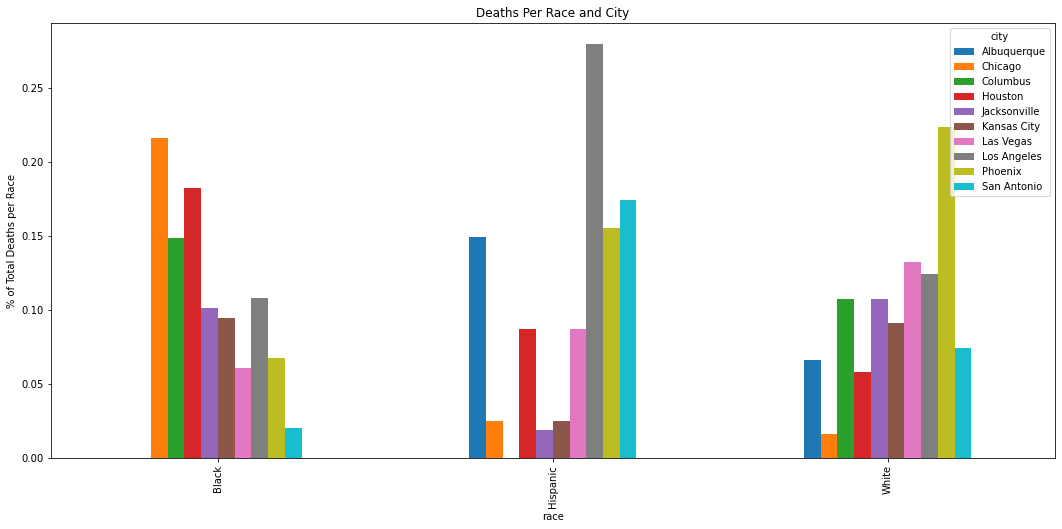

In [131]:
df3_race_city.groupby('race').city.value_counts(normalize=True).unstack().plot(kind='bar', figsize=(18,8))
plt.title('Deaths Per Race and City')
plt.ylabel('% of Total Deaths per Race')

In [52]:
df3_race_city.groupby('race').city.value_counts(normalize = True).unstack()

city,Albuquerque,Chicago,Columbus,Houston,Jacksonville,Kansas City,Las Vegas,Los Angeles,Phoenix,San Antonio
race,,,,,,,,,,
Black,NaN,0.216216,0.148649,0.182432,0.101351,0.094595,0.060811,0.108108,0.067568,0.020270
Hispanic,0.149068,0.024845,NaN,0.086957,0.018634,0.024845,0.086957,0.279503,0.155280,0.173913
White,0.066116,0.016529,0.107438,0.057851,0.107438,0.090909,0.132231,0.123967,0.223140,0.074380


Text(0, 0.5, '% of Total Deaths per Race')

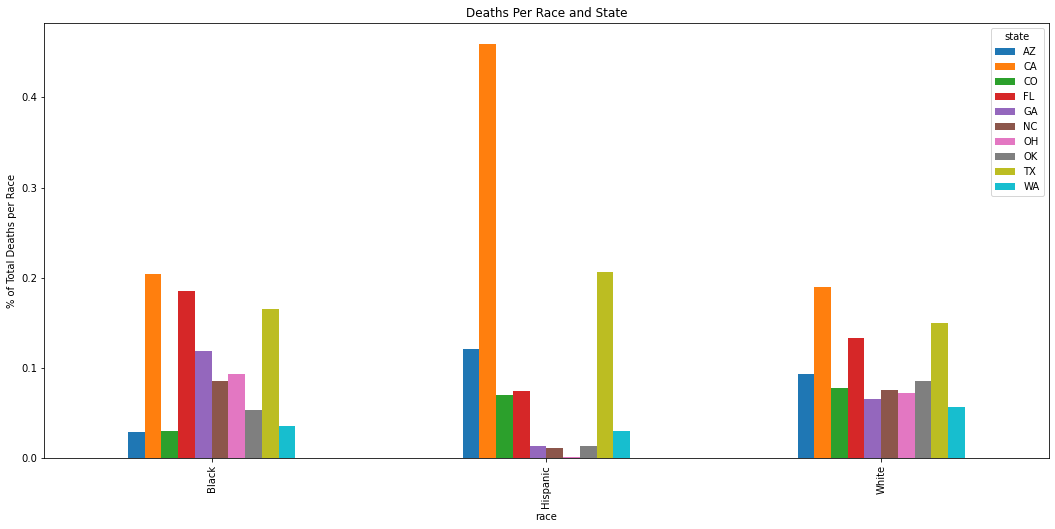

In [133]:
df3_race_state.groupby('race').state.value_counts(normalize=True).unstack().plot(kind='bar', figsize=(18,8))
plt.title('Deaths Per Race and State')
plt.ylabel('% of Total Deaths per Race')

In [54]:
df3_race_state.groupby('race').state.value_counts(normalize=True).unstack()

state,AZ,CA,CO,FL,GA,NC,OH,OK,TX,WA
race,,,,,,,,,,
Black,0.028428,0.204013,0.030100,0.185619,0.118729,0.085284,0.093645,0.053512,0.165552,0.035117
Hispanic,0.120640,0.459302,0.069767,0.074128,0.013081,0.011628,0.001453,0.013081,0.206395,0.030523
White,0.093402,0.189374,0.077978,0.133676,0.065981,0.075407,0.071979,0.085690,0.149957,0.056555


# VISUALIZATION - THREAT LEVEL, FLEE & ARMED BY RACE

Text(0.5, 1.0, 'Percentage of Armed Individuals by Race')

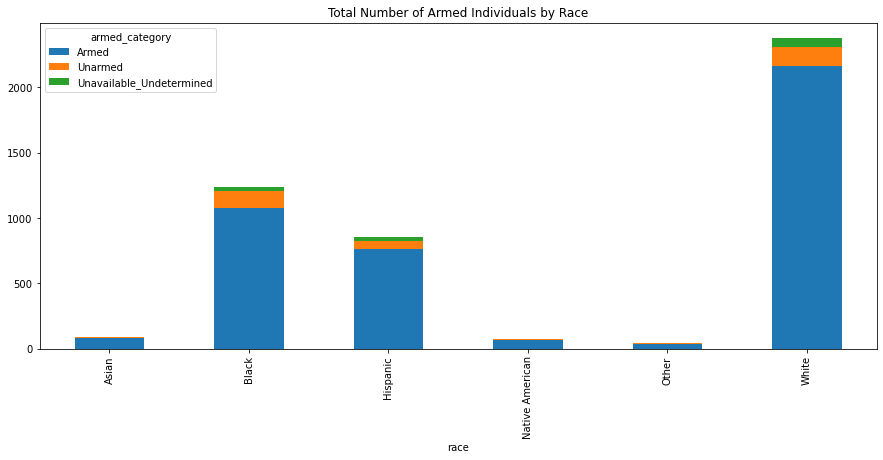

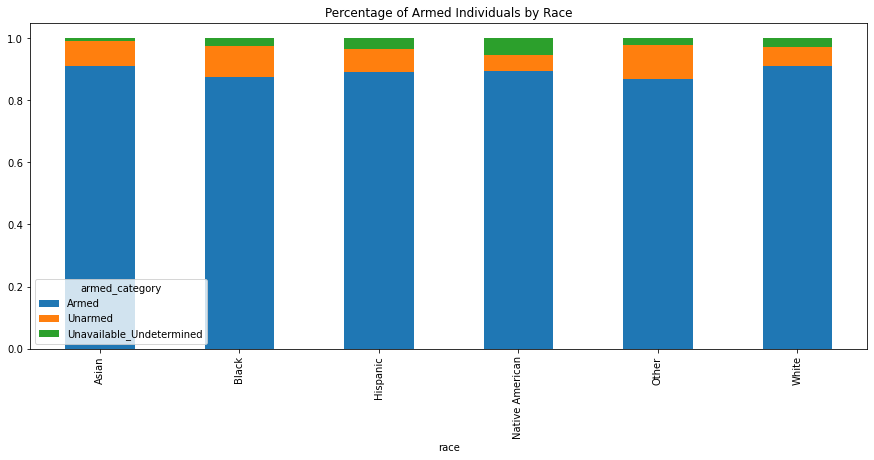

In [169]:
df3.groupby('race').armed_category.value_counts().unstack().plot(kind = 'bar', stacked=True,figsize = (15,6))
plt.title('Total Number of Armed Individuals by Race')


df3.groupby('race').armed_category.value_counts(normalize=True).unstack().plot(kind = 'bar', stacked=True,figsize = (15,6))
plt.title('Percentage of Armed Individuals by Race')



In [57]:
vis1b_df = df3.groupby('race').flee_category.value_counts(normalize=True).unstack()
vis1b_df

flee_category,Fleeing,Not_Fleeing
race,,
Asian,0.193182,0.806818
Black,0.411859,0.588141
Hispanic,0.373239,0.626761
Native American,0.356164,0.643836
Other,0.361702,0.638298
White,0.303782,0.696218


Text(0.5, 1.0, 'Percentage of Individuals by Flee Category')

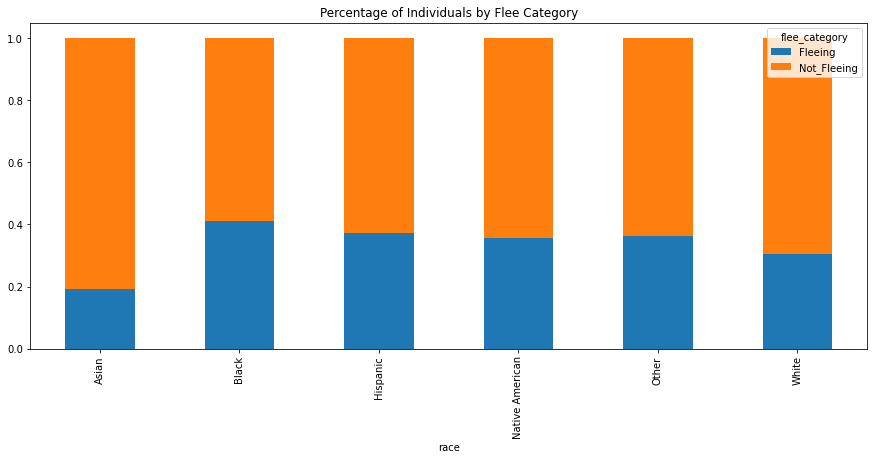

In [135]:
vis1b_df.plot(kind = 'bar', stacked = True, figsize=(15,6))
plt.title('Percentage of Individuals by Flee Category')

Text(0.5, 1.0, 'Likelyhood of Individual to Attack When Unarmed')

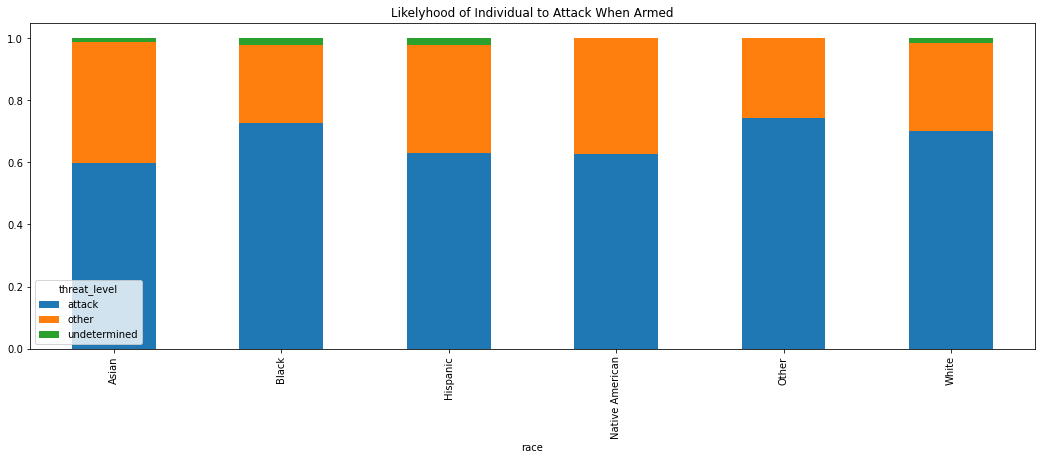

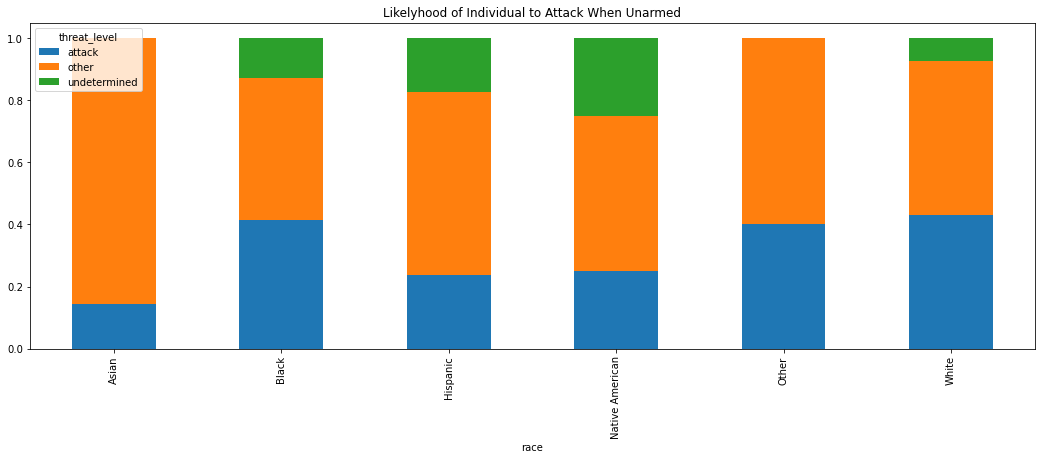

In [167]:
VIS1D = df3[df3.armed_category == 'Armed'].groupby('race').threat_level.value_counts(normalize=True).unstack().plot(kind='bar', stacked= True, figsize=(18,6))
plt.title('Likelyhood of Individual to Attack When Armed')


VIS1E = df3[df3.armed_category == 'Unarmed'].groupby('race').threat_level.value_counts(normalize=True).unstack().plot(kind='bar', stacked= True, figsize=(18,6))
plt.title('Likelyhood of Individual to Attack When Unarmed')


# We can see all races are less likely to attack police when unarmed. 
# Asians are least likely to attack police overall. 
# Black, Other and White are the most likely to attack police both Armed and Unarmed

In [62]:
df3.groupby('race').armed_category.value_counts(normalize = True).unstack()

armed_category,Armed,Unarmed,Unavailable_Undetermined
race,,,
Asian,0.911111,0.077778,0.011111
Black,0.875203,0.099676,0.025122
Hispanic,0.891482,0.073512,0.035006
Native American,0.893333,0.053333,0.053333
Other,0.866667,0.111111,0.022222
White,0.910391,0.061422,0.028187


In [64]:
df3[df3.flee_category == 'Fleeing'].groupby('race').armed_category.value_counts(normalize=True).unstack()
#As a surprise, Asians are the most likely to try to flee in case they are unarmed, followed by Black

armed_category,Armed,Unarmed,Unavailable_Undetermined
race,,,
Asian,0.714286,0.214286,0.071429
Black,0.831915,0.136170,0.031915
Hispanic,0.856643,0.104895,0.038462
Native American,0.840000,0.080000,0.080000
Other,0.866667,0.066667,0.066667
White,0.880805,0.082043,0.037152


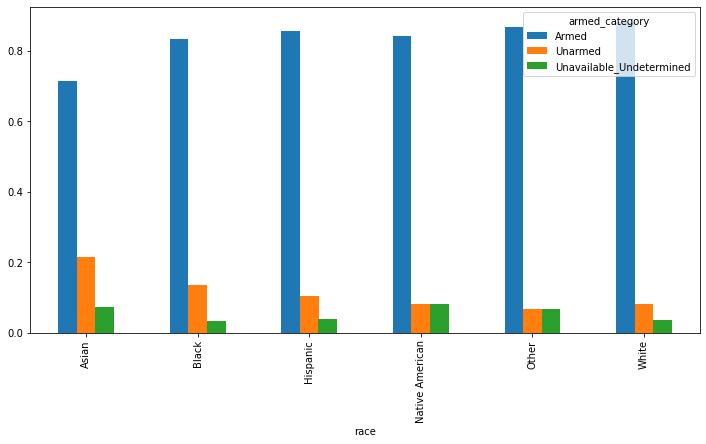

In [65]:
df3[df3.flee_category == 'Fleeing'].groupby('race').armed_category.value_counts(normalize=True).unstack().plot(kind = 'bar', stacked=False,figsize = (12,6))
# Likelyhood of individual trying to flee in case they are armed or unarmed

#  VISUALIZATION - DEATHS BY RACE AND STATE

Text(0.5, 1.0, 'Percentage of Deaths in Top 10 States')

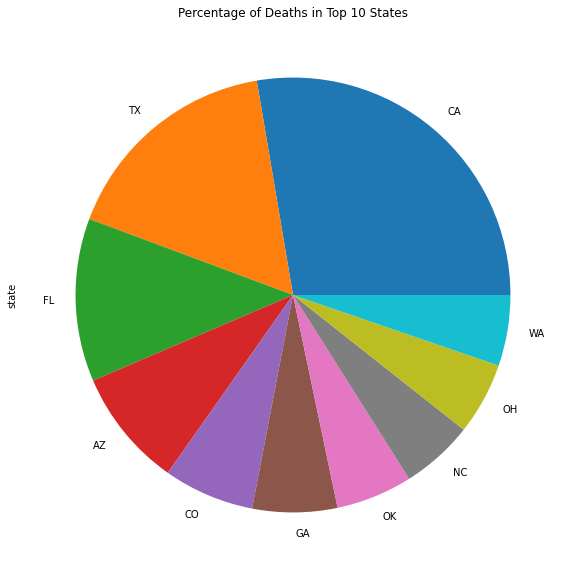

In [177]:
df3.state.value_counts(normalize=False)[:10].plot(kind='pie', figsize=(10,10))
plt.title('Percentage of Deaths in Top 10 States')

Text(0.5, 1.0, 'Total Number of Individuals Killed When Unrmed, by State and Race')

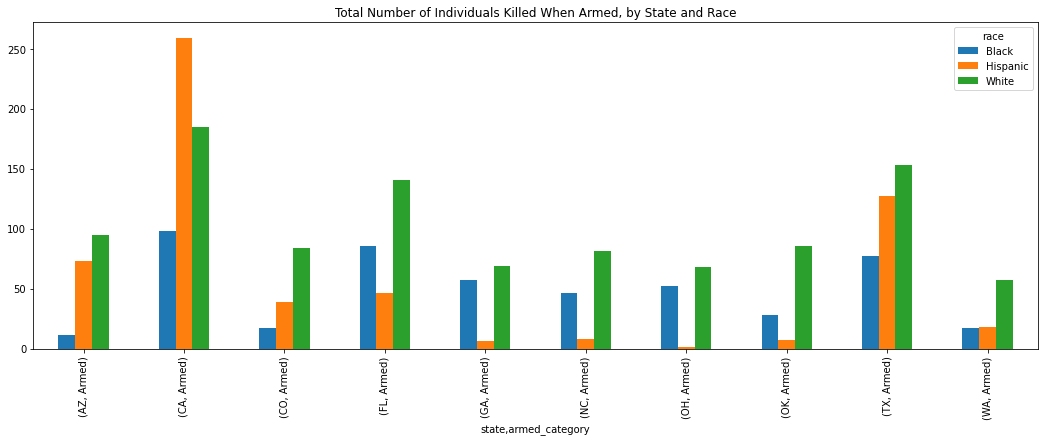

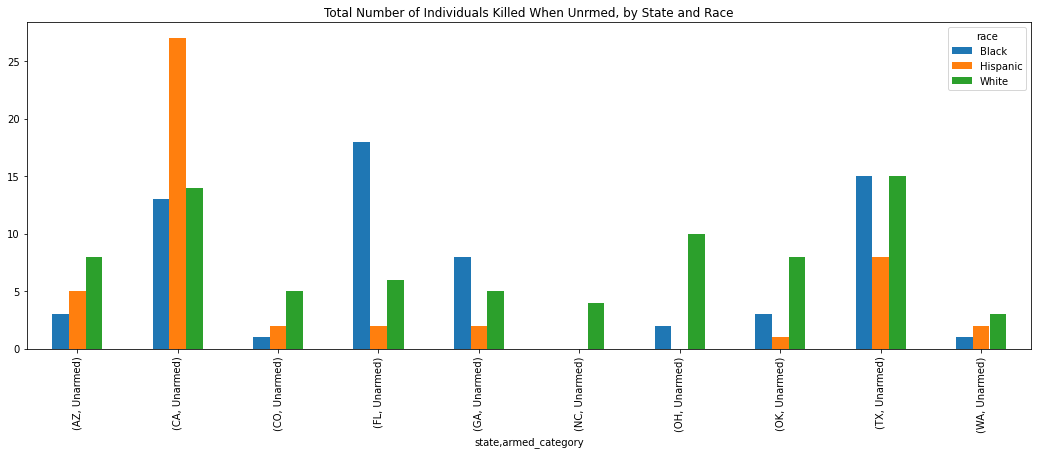

In [178]:
VIS2A = df3_race_state[df3_race_state.armed_category == 'Armed'].groupby(['state','armed_category']).race.value_counts().unstack().plot(kind = 'bar', stacked=False, figsize = (18,6))
plt.title('Total Number of Individuals Killed When Armed, by State and Race')

VIS2B = df3_race_state[df3_race_state.armed_category == 'Unarmed'].groupby(['state','armed_category']).race.value_counts().unstack().plot(kind = 'bar', stacked=False, figsize=(18,6))
plt.title('Total Number of Individuals Killed When Unrmed, by State and Race')

# VISUALS 3 - IS THE POLICE KILLING UNARMED MINORITIES?

In [70]:
df3.groupby(['armed_category','race']).threat_level.value_counts(normalize=True).unstack()


threat_level                                attack     other  undetermined
armed_category           race                                             
Armed                    Asian            0.597561  0.390244      0.012195
                         Black            0.726852  0.250000      0.023148
                         Hispanic         0.629581  0.346859      0.023560
                         Native American  0.626866  0.373134           NaN
                         Other            0.743590  0.256410           NaN
                         White            0.701017  0.281885      0.017098
Unarmed                  Asian            0.142857  0.857143           NaN
                         Black            0.414634  0.455285      0.130081
                         Hispanic         0.238095  0.587302      0.174603
                         Native American  0.250000  0.500000      0.250000
                         Other            0.400000  0.600000           NaN
                         White            0.431507  0.493151      0.075342
Unavailable_Undetermined Asian                 NaN  1.000000           NaN
                         Black            0.096774  0.290323      0.612903
                         Hispanic         0.166667  0.300000      0.533333
                         Native American       NaN  0.250000      0.750000
                         Other                 NaN  1.000000           NaN
                         White            0.194030  0.223881      0.582090

Text(0.5, 1.0, 'Number of Deaths of Unarmed Individuals categorized by Threat Level and Race')

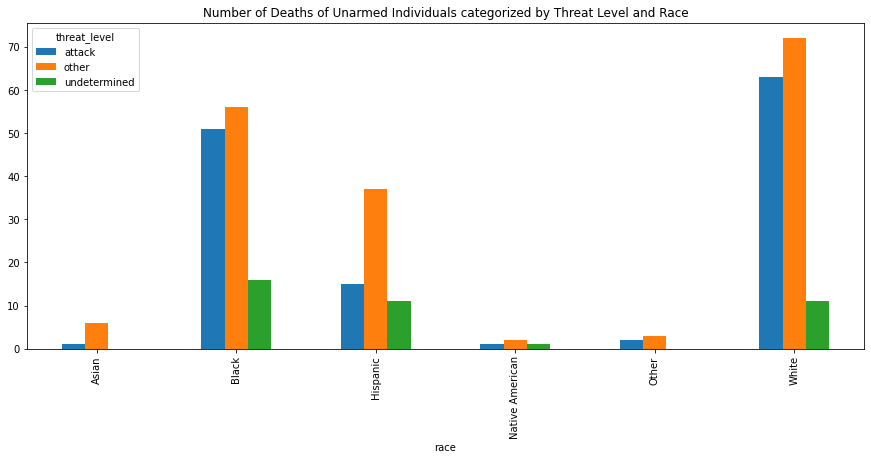

In [183]:
df3[df3.armed_category == 'Unarmed'].groupby('race').threat_level.value_counts(normalize=False).unstack().plot(kind='bar', figsize=(15,6))
plt.title('Number of Deaths of Unarmed Individuals categorized by Threat Level and Race')

#The owner of the dataset probably needs to be more specific on what 'Other' in Threat Level means, given that it was the largest category for all races

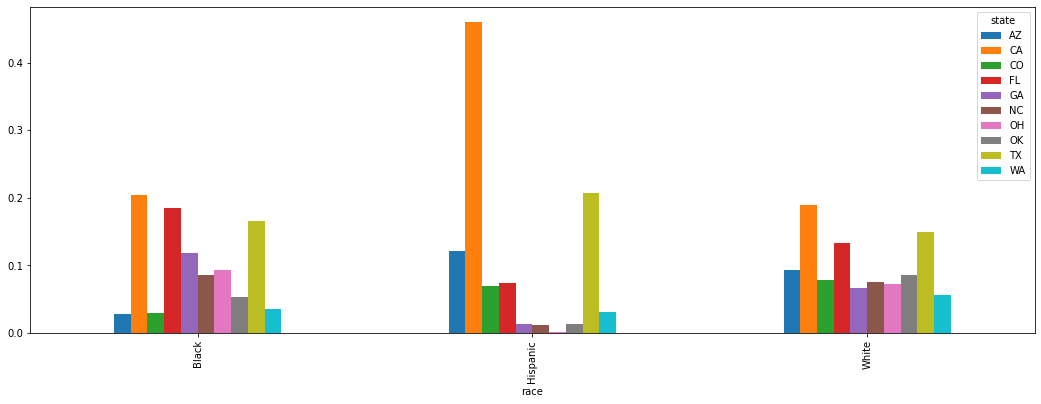

In [185]:
VIS2B = df3_race_state.groupby('race').state.value_counts(normalize=True).unstack().plot(kind = 'bar', figsize = (18,6))
#Where do most races die based on % of total deaths in top 10 states

# VISUALIZATION - DEATHS BY RACE AND CITY


Text(0.5, 1.0, 'Deadliest Cities in the US')

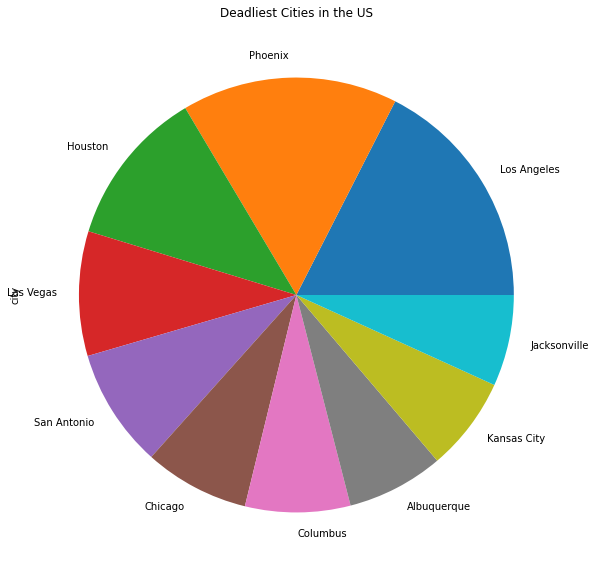

In [186]:
df3.city.value_counts(normalize=False)[:10].plot(kind='pie', figsize=(10,10))
plt.title('Deadliest Cities in the US')

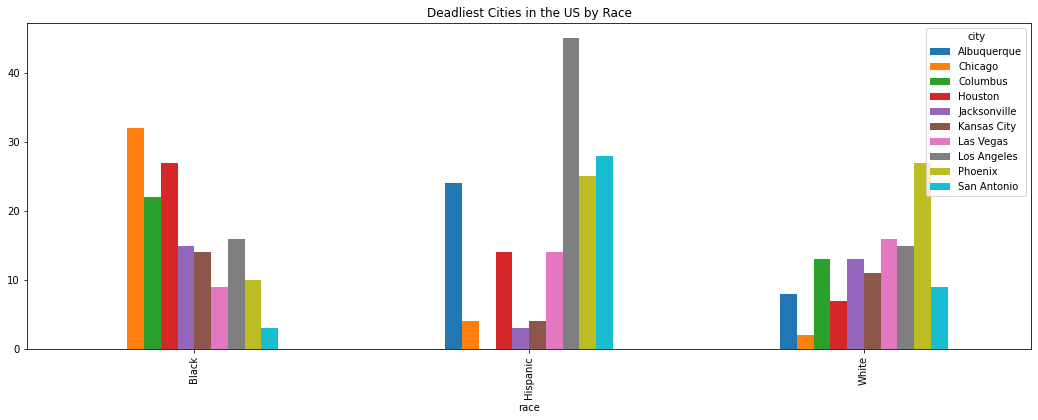

In [187]:
VIS3A = df3_race_city.groupby('race').city.value_counts(normalize=False).unstack().plot(kind='bar', figsize=(18,6))
plt.title('Deadliest Cities in the US by Race')
VIS3A

In [76]:
df3_race_city[df3_race_city.armed_category == 'Unarmed'].groupby(['city','armed_category','threat_level']).race.value_counts(normalize=False).unstack()

race                                      Black  Hispanic  White
city         armed_category threat_level                        
Albuquerque  Unarmed        attack          NaN       1.0    NaN
                            other           NaN       1.0    1.0
Chicago      Unarmed        other           2.0       NaN    NaN
                            undetermined    NaN       1.0    NaN
Houston      Unarmed        attack          NaN       NaN    1.0
                            other           2.0       1.0    NaN
Jacksonville Unarmed        attack          1.0       NaN    NaN
                            other           1.0       NaN    NaN
Kansas City  Unarmed        undetermined    1.0       NaN    NaN
Las Vegas    Unarmed        attack          NaN       1.0    NaN
                            other           1.0       1.0    NaN
Los Angeles  Unarmed        attack          1.0       NaN    1.0
                            other           1.0       2.0    NaN
Phoenix      Unarmed        other           1.0       1.0    1.0
San Antonio  Unarmed        other           2.0       NaN    NaN

Text(0.5, 1.0, 'Armed Category and Race of Individuals Killed in Deadliest Cities')

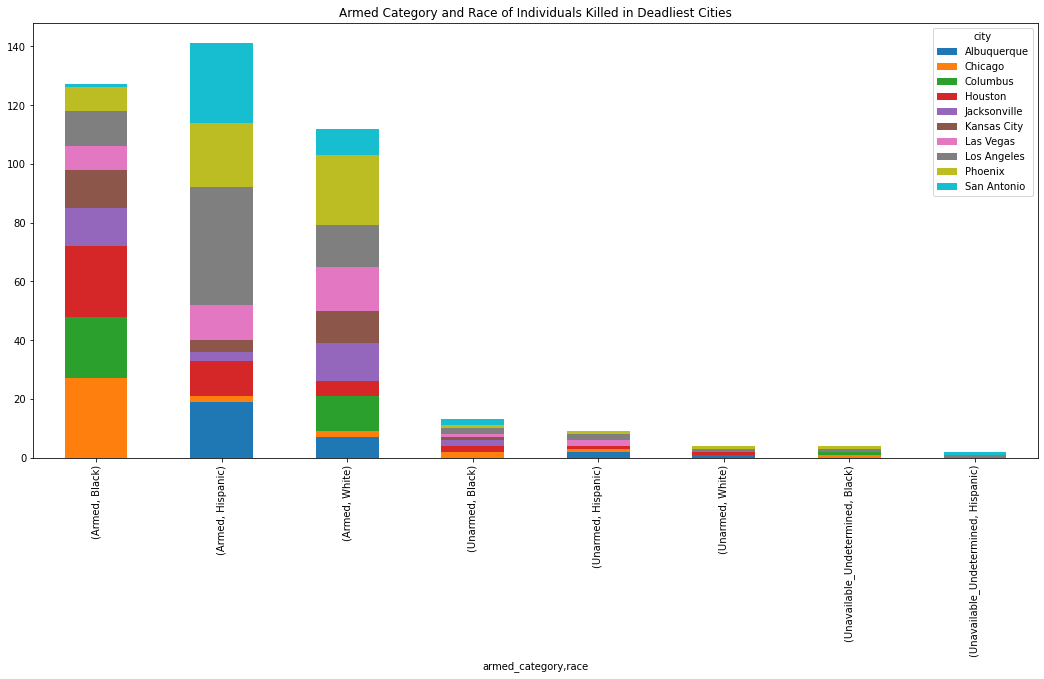

In [193]:
df3_race_city.groupby(['armed_category','race']).city.value_counts(normalize=False).unstack().plot(kind='bar', stacked=True, figsize=(18,8))
plt.title('Armed Category and Race of Individuals Killed in Deadliest Cities')
#trend remains the same in deadliest cities, with the majority individuals killed being armed

# CURIOSITIES

Finding cases of Police Brutallity by Race and States

In [78]:
(df3.groupby('armed_category').flee_category.value_counts().unstack())

flee_category,Fleeing,Not_Fleeing
armed_category,,
Armed,1373,3095
Unarmed,153,191
Unavailable_Undetermined,64,72


In [79]:
((df3.groupby('armed_category').flee_category.value_counts().unstack())/(df3.shape[0]))*100

# "Only" 3.5% of all deaths were related to unarmed civilians that were not fleeing. 



flee_category,Fleeing,Not_Fleeing
armed_category,,
Armed,25.346133,57.134946
Unarmed,2.824442,3.525937
Unavailable_Undetermined,1.181466,1.329149


In [80]:
((df3.groupby(['armed_category','threat_level']).flee_category.value_counts().unstack())/(df3.shape[0]))*100

# "Only" 1.9% of all deaths were related to unarmed civilians that were not fleeing and were not attacking the police. 


flee_category                            Fleeing  Not_Fleeing
armed_category           threat_level                        
Armed                    attack        18.497323    38.803766
                         other          6.276537    17.352778
                         undetermined   0.572272     0.978401
Unarmed                  attack         0.867639     1.624515
                         other          1.642976     1.550674
                         undetermined   0.313827     0.350748
Unavailable_Undetermined attack         0.221525     0.258446
                         other          0.424589     0.332287
                         undetermined   0.535352     0.738416

Unarmed, Not attacking, Not Fleeing

In [81]:
ThreatLevelList = ['other', 'undetermined']

df_unarmed_nothreat_notfleeing = df3[(df3.threat_level.isin(ThreatLevelList)) & (df3.armed_category == 'Unarmed') & (df3.flee_category == 'Not_Fleeing')]
df_unarmed_nothreat_notfleeing.shape

(103, 18)

In [82]:
df_unarmed_nothreat_notfleeing.race.value_counts(normalize=True)

White              0.441176
Black              0.303922
Hispanic           0.186275
Other              0.029412
Asian              0.029412
Native American    0.009804
Name: race, dtype: float64

Armed, Attacking, Not Fleeing

In [83]:
ThreatLevelList = ['attack']

df_armed_threat_notfleeing = df3[(df3.threat_level.isin(ThreatLevelList)) & (df3.armed_category == 'Armed') & (df3.flee_category == 'Not_Fleeing')]
df_armed_threat_notfleeing.shape

(2102, 18)

In [84]:
df_armed_threat_notfleeing.race.value_counts(normalize=True)

White              0.554440
Black              0.245243
Hispanic           0.155391
Asian              0.020613
Native American    0.014271
Other              0.010042
Name: race, dtype: float64

Armed, Attacking, Fleeing


In [85]:
ThreatLevelList = ['attack']

df_armed_threat_fleeing = df3[(df3.threat_level.isin(ThreatLevelList)) & (df3.armed_category == 'Armed') & (df3.flee_category == 'Fleeing')]
df_armed_threat_fleeing.shape

(1002, 18)

In [86]:
df_armed_threat_fleeing.race.value_counts(normalize=True)

White              0.464325
Black              0.318332
Hispanic           0.183315
Native American    0.015368
Other              0.009879
Asian              0.008782
Name: race, dtype: float64

In [87]:
# Percentage of killings per state, of citiezed that were unarmed, no threat and not fleeing

((df_unarmed_nothreat_notfleeing.state.value_counts(normalize=False)/df3.state.value_counts(normalize=False))*100).sort_values(ascending=False)

NE    8.333333
DC    7.692308
MN    4.918033
CT    4.761905
OK    4.268293
KS    4.000000
MD    3.797468
TX    3.742204
PA    3.703704
IA    3.125000
MS    3.076923
NJ    2.941176
LA    2.752294
GA    2.747253
MI    2.564103
AZ    2.362205
FL    2.285714
VA    2.105263
KY    2.105263
NY    1.980198
OH    1.935484
NM    1.886792
WV    1.851852
CA    1.752190
UT    1.666667
MO    1.418440
IN    1.052632
NV    1.041667
AL    0.961538
WA    0.657895
DE    0.000000
IL    0.000000
HI    0.000000
CO    0.000000
ID    0.000000
AR    0.000000
WY    0.000000
MA    0.000000
ME    0.000000
MT    0.000000
NC    0.000000
ND    0.000000
NH    0.000000
OR    0.000000
RI    0.000000
SC    0.000000
SD    0.000000
TN    0.000000
VT    0.000000
WI    0.000000
AK    0.000000
Name: state, dtype: float64

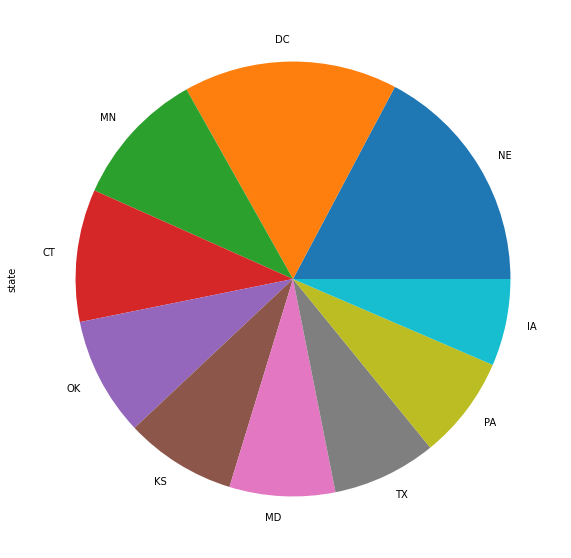

In [88]:
((df_unarmed_nothreat_notfleeing.state.value_counts()/df3.state.value_counts())*100).sort_values(ascending=False)[:10].plot(kind='pie', figsize=(10,10))

# Despite of low mortality rates in these states, the chance of being shot while unarmed, not posing threat and not fleeing is higher than in the states with higher total killings

# Deaths per Year, Month and Race

In [119]:
df3.year.value_counts(normalize=True)

2019.0    0.185007
2015.0    0.183530
2018.0    0.182976
2017.0    0.182053
2016.0    0.177622
2020.0    0.088811
Name: year, dtype: float64

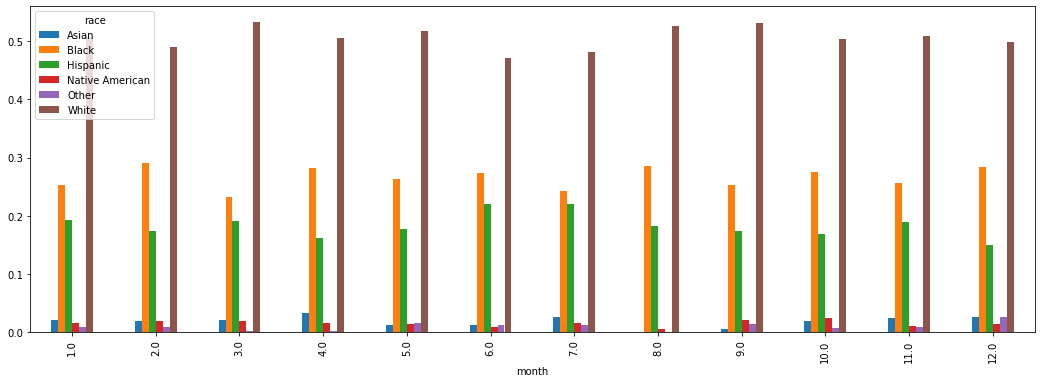

In [112]:
df3.groupby('month').race.value_counts(normalize=True).unstack().plot(kind='bar', figsize=(18,6))

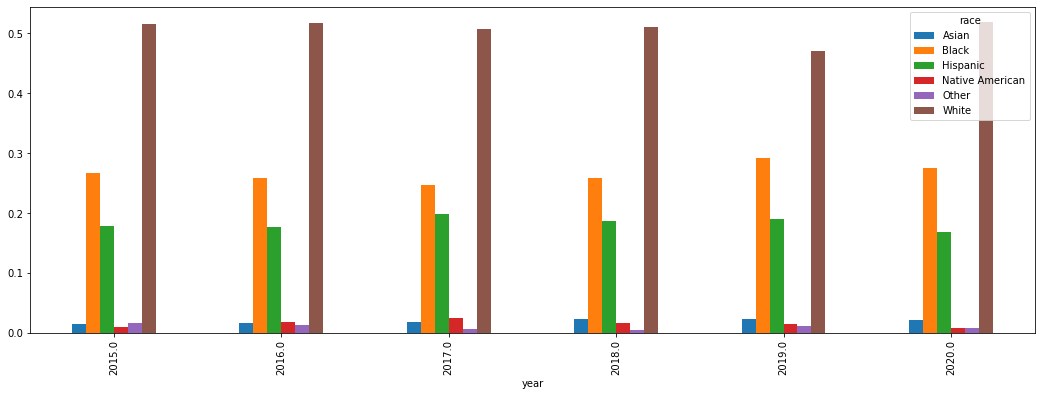

In [116]:
df3.groupby('year').race.value_counts(normalize=True).unstack().plot(kind='bar', figsize=(18,6))

# DEATH BY RACE WITH BODY CAMERA

Text(0.5, 1.0, 'Percentage of Fatalities Captured on Body Camera by Race')

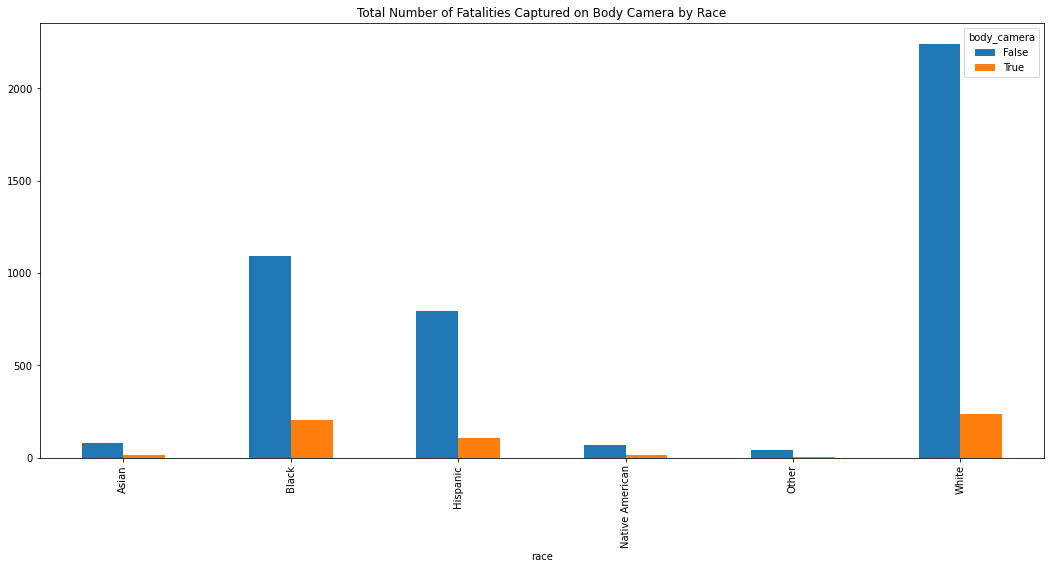

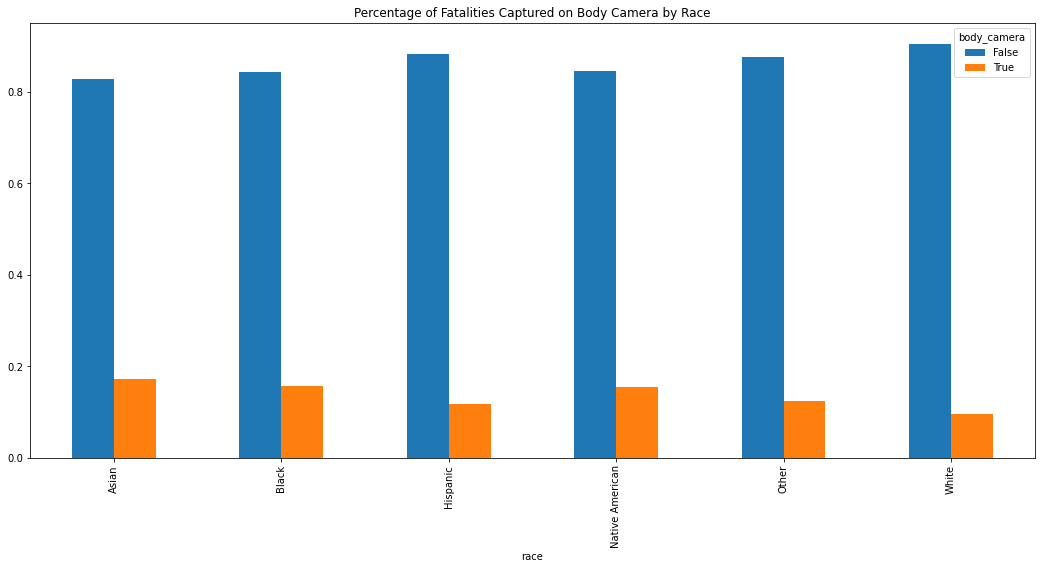

In [194]:
df3.groupby('race').body_camera.value_counts(normalize=False).unstack().plot(kind='bar', figsize=(18,8))
plt.title('Total Number of Fatalities Captured on Body Camera by Race')
df3.groupby('race').body_camera.value_counts(normalize=True).unstack().plot(kind='bar', figsize=(18,8))
plt.title('Percentage of Fatalities Captured on Body Camera by Race')



In [158]:
df3.groupby('race').body_camera.value_counts().unstack()

body_camera,False,True
race,,
Asian,77,16
Black,1094,204
Hispanic,796,106
Native American,66,12
Other,42,6
White,2242,234


In [162]:
df3.groupby('race').body_camera.value_counts(normalize=True).unstack()

body_camera,False,True
race,,
Asian,0.827957,0.172043
Black,0.842835,0.157165
Hispanic,0.882483,0.117517
Native American,0.846154,0.153846
Other,0.875000,0.125000
White,0.905493,0.094507
